# House Sales in King County, USA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

## 1. Importing Data Sets

In [4]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name) #assign the csv into df

In [5]:
df.head () #print first 5 rows to have a look

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.dtypes #Display data types of all column

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.describe()  #Display the statistical summary of the dataframe.

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 2. Data Wrangling

In [9]:
df.drop(['id','Unnamed: 0'],axis=1,inplace=True) #drop the columns of "id" and "Unnmaed"
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
#count the no.of missing value with mean
print("no. of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum()) #see the missing value of the columns  bedrooms and  bathrooms
print("no. of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

no. of NaN values for the column bedrooms : 13
no. of NaN values for the column bathrooms : 10


In [11]:
#Replace missing value with mean
mean=df['bedrooms'].mean()  #caculate the mean of columns the bedrooms
df['bedrooms'].replace(np.nan,mean, inplace=True) #replace the missing value with the means
mean=df['bathrooms'].mean() #caculate the mean of columns the bathrooms
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [12]:
#count the no.of missing value in the columns again. 
print("no. of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("no. of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

no. of NaN values for the column bedrooms : 0
no. of NaN values for the column bathrooms : 0


## 3. Exploratory Data Analysis

In [13]:
#Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<AxesSubplot:xlabel='waterfront', ylabel='price'>

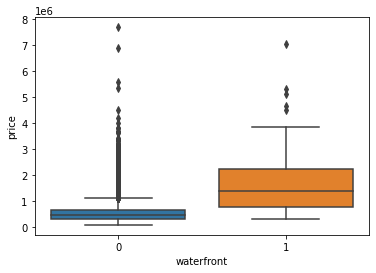

In [14]:
# Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.
sns.boxplot(x="waterfront", y="price", data=df)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

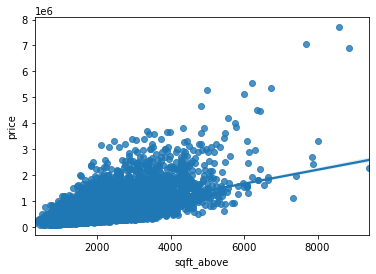

In [28]:
#Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.
sns.regplot(x="sqft_above", y="price", data=df)

In [29]:
#use method corr() in Pandas to find the feature that is most correlated with price(expecting price)
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## 4 Model Development

In [31]:
#Fit a linear regression model using the longitude feature 'long' and caculate the R^2.
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print("('long') The R^2 value is: ",lm.score(X, Y)) 

('long') The R^2 value is:  0.00046769430149007363


In [30]:
#Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. 
X = df[['sqft_living']]
Y = df[['price']]
lm.fit(X,Y)
print("('sqft_living') The R^2 value is: ", lm.score(X,Y))

('sqft_living') The R^2 value is:  0.4928532179037931


In [21]:
#Fit a linear regression model to predict the 'price' using the list of features and calculate the R^2 score
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X=df[features] 
lm.fit(X, df['price'])
print("The R^2 is:",lm.score(X, df['price']))

The R^2 is: 0.6576569675583581


In [22]:
#Create a list of tuples and use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X,df['price'])
pipe.score(X,df['price'])

0.7513417707683823

## 5. Model Evaluation and Refinement

In [23]:
from sklearn.model_selection import cross_val_score #import neccessary modules:
from sklearn.model_selection import train_test_split

In [32]:
#split the data into training and testing sets:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1) #use 15% of samples to test


print("no. of test samples:", x_test.shape[0])
print("no. of training samples:",x_train.shape[0])

no. of test samples: 3242
no. of training samples: 18371


### Ridge regression

In [25]:
from sklearn.linear_model import Ridge

In [26]:
#Create and fit a Ridge regression object using the training data, set the regularization parameter(alpha) to 0.1, and calculate the R^2 using the test data
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
ridge.score(x_test,y_test)

0.6478759163939113

In [27]:
#Perform a second order polynomial transform on both the training data and testing data. 
#Create and fit a Ridge regression object using the training data, set the alpha to 0.1, and calculate the R^2 utilising the test data provided.

pf=PolynomialFeatures(degree=2)
x_test_data = pf.fit_transform(x_test)
x_train_data= pf.fit_transform(x_train)
ridge1=Ridge(alpha=0.1)
ridge1.fit(x_train_data,y_train)
ridge1.score(x_test_data,y_test)

0.7002744273468813